In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [3]:
df = pd.read_csv('drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [4]:
df_num = pd.DataFrame()
for col in df.columns:
  if df[col].dtypes == object:
    df_num[col] = df [col].astype('category').cat.codes
  else:
    df_num[col] = df[col]
df_num.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0


In [ ]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [ ]:
df_num.describe()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,44.315000,0.520000,0.910000,0.485000,16.084485,1.595000
std,16.544315,0.500854,0.821752,0.501029,7.223956,1.716305
min,15.000000,0.000000,0.000000,0.000000,6.269000,0.000000
25%,31.000000,0.000000,0.000000,0.000000,10.445500,0.000000
50%,45.000000,1.000000,1.000000,0.000000,13.936500,1.000000
75%,58.000000,1.000000,2.000000,1.000000,19.380000,4.000000
max,74.000000,1.000000,2.000000,1.000000,38.247000,4.000000


In [5]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

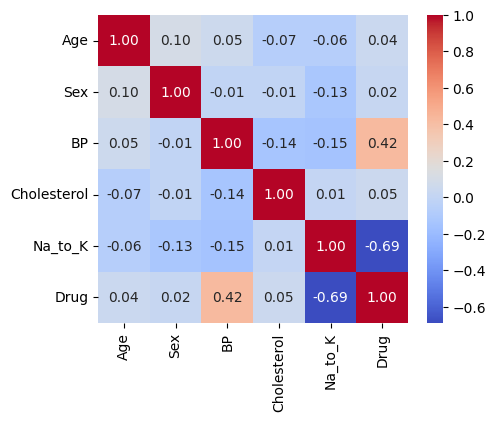

In [6]:
corr = df_num.corr()
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
plt.show()

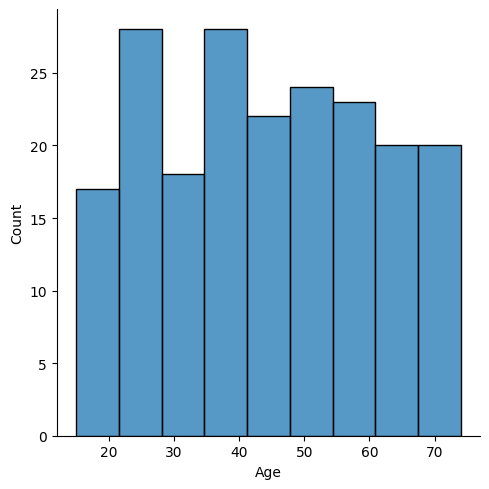

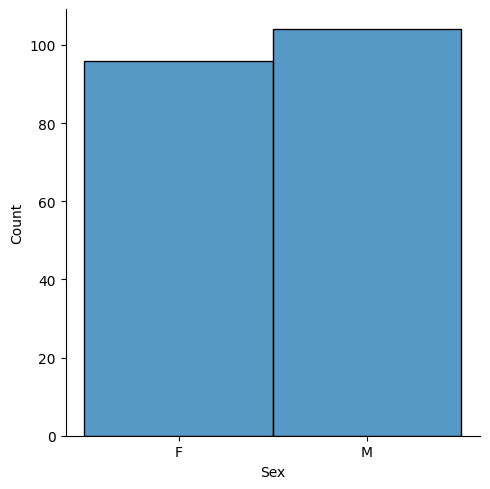

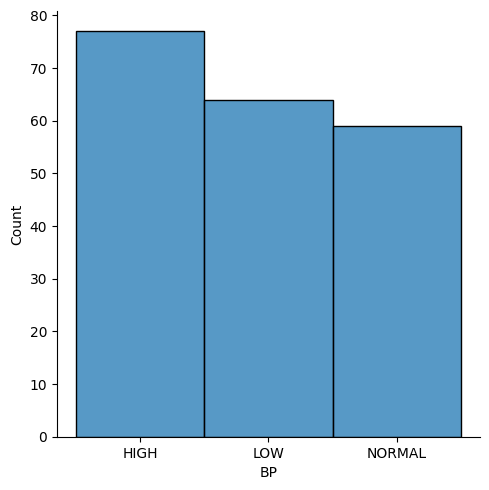

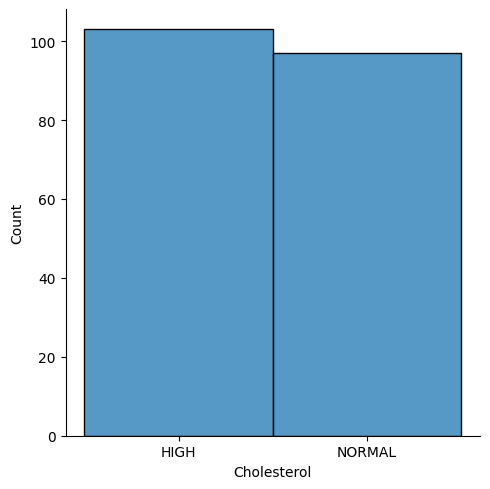

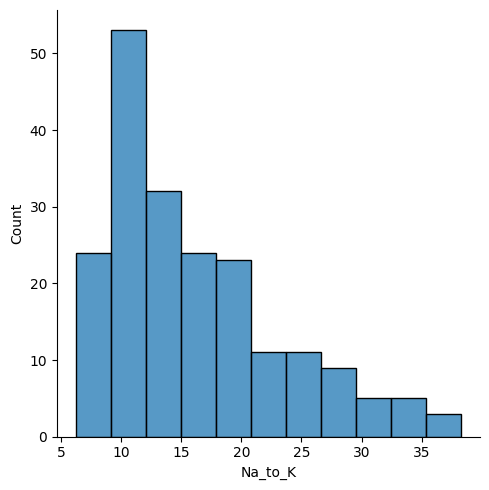

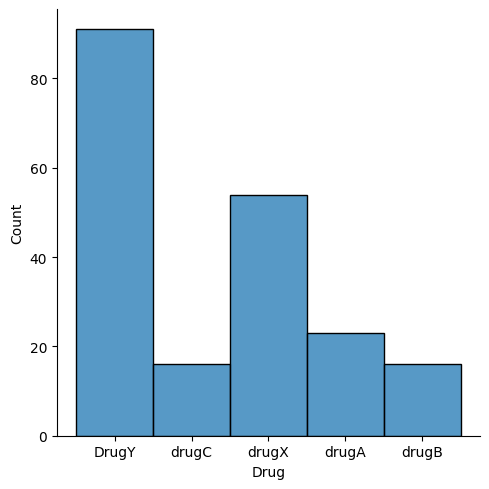

In [ ]:
for col in df.columns:
  sns.displot(df[col])

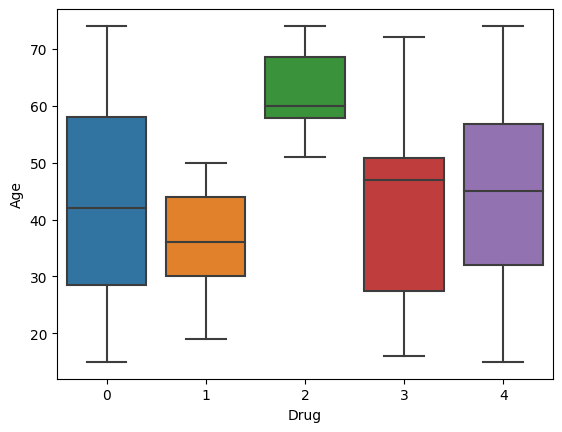

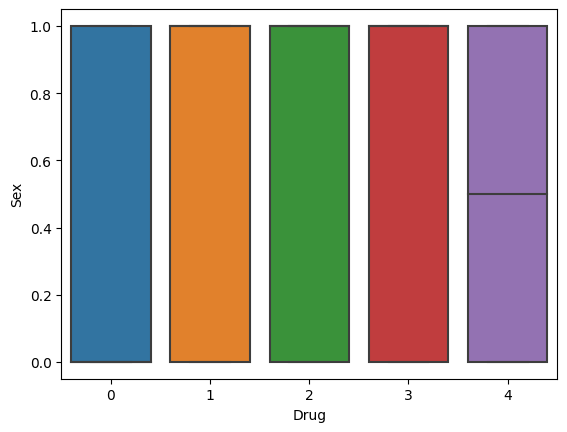

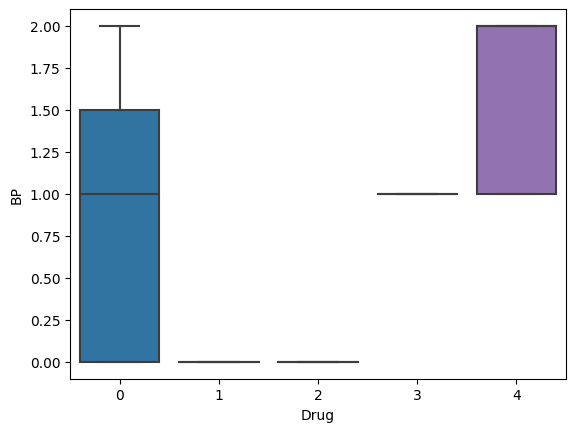

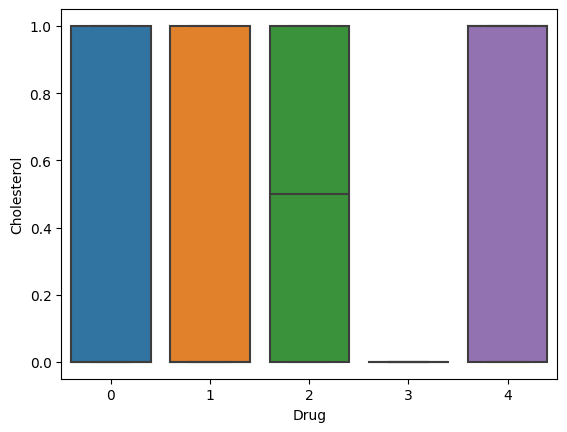

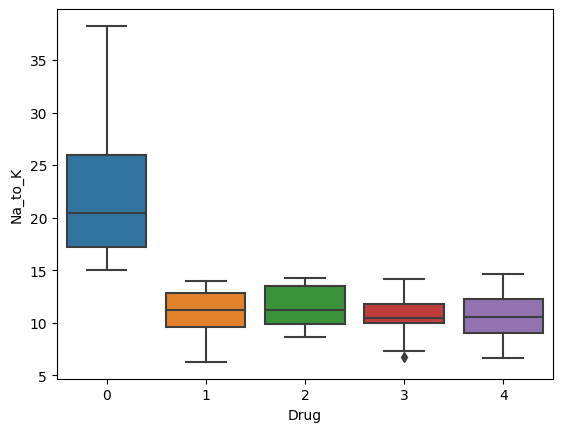

In [ ]:
for col in df.columns[:-1]:
    figure = plt.figure()
    ax = sns.boxplot(x='Drug', y=col, data=df_num)

In [7]:
X = df_num.drop(['Drug'], axis = 1)
y = df_num['Drug']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

scaler = StandardScaler()
scaler.fit(X_train)

scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

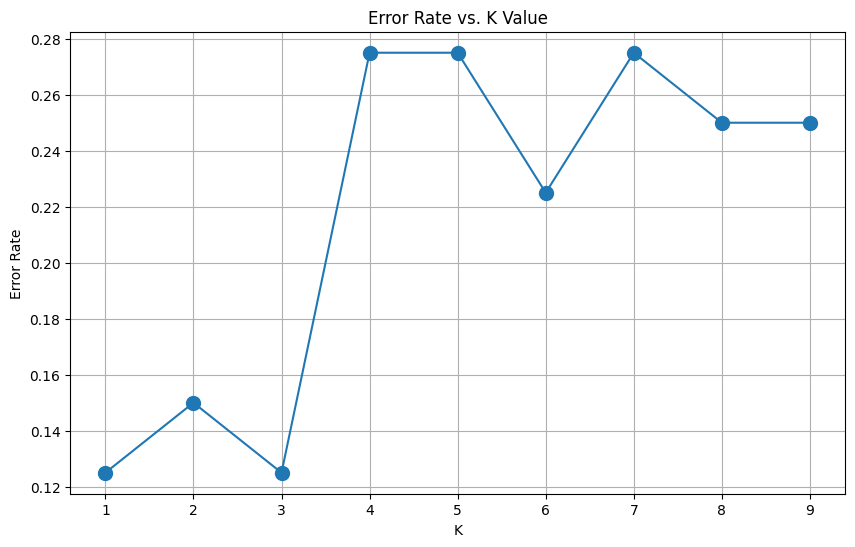

In [8]:
error_rate = []

for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(scaled_X_train, y_train)
    pred_i = knn.predict(scaled_X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1, 10), error_rate, marker='o', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(scaled_X_train, y_train)
pred = knn.predict(scaled_X_test)
print(confusion_matrix(y_test,pred))

[[15  0  1  0  0]
 [ 0  4  0  0  0]
 [ 0  0  3  0  0]
 [ 2  0  0  4  0]
 [ 0  0  0  0 11]]


In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91        16
           1       1.00      1.00      1.00         4
           2       0.75      1.00      0.86         3
           3       1.00      0.67      0.80         6
           4       1.00      1.00      1.00        11

    accuracy                           0.93        40
   macro avg       0.93      0.92      0.91        40
weighted avg       0.93      0.93      0.92        40



In [ ]:
print(accuracy_score(y_test,pred))

0.925


In [ ]:
model = DecisionTreeClassifier(criterion='gini')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00        11

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [ ]:
print(confusion_matrix(y_test, y_pred))

[[16  0  0  0  0]
 [ 0  4  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  6  0]
 [ 0  0  0  0 11]]


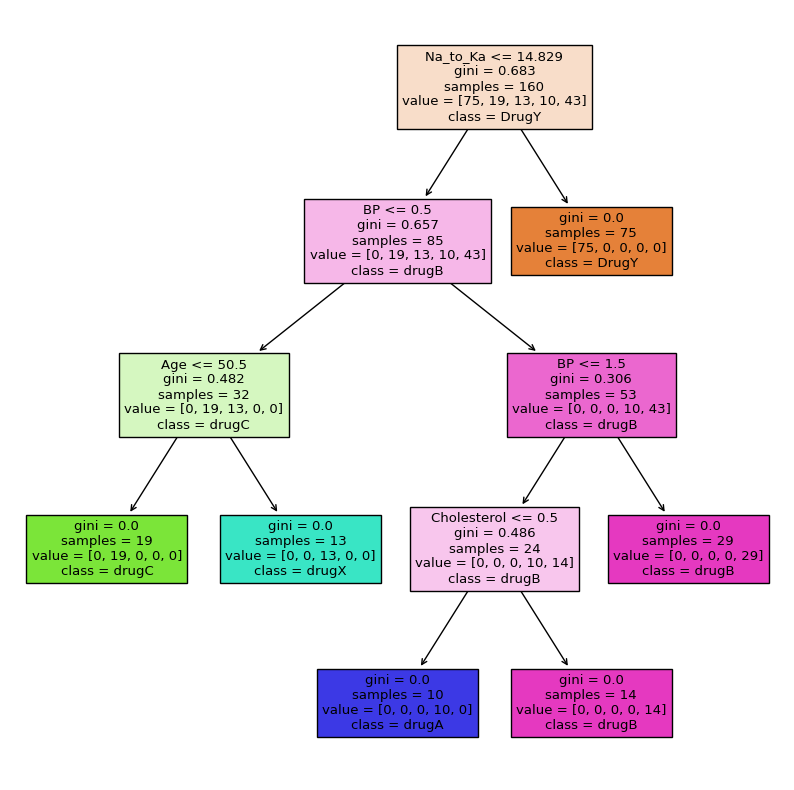

In [ ]:
plt.figure(figsize = (10, 10))
plot_tree(model, feature_names = ['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_Ka'],
          class_names = ['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], filled = True)
plt.show()

In [ ]:
print(accuracy_score(y_test, y_pred))

1.0


In [12]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit=True)
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [13]:
grid.best_params_

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}

In [14]:
grid.best_estimator_

SVC(C=1000, gamma=0.01)

In [17]:
grid_predictions = grid.predict(scaled_X_test)
print(confusion_matrix(y_test,grid_predictions))

[[18  0  0  0  1]
 [ 0  5  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  6  0]
 [ 0  0  0  0  7]]


In [19]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         6
           4       0.88      1.00      0.93         7

    accuracy                           0.97        40
   macro avg       0.97      0.99      0.98        40
weighted avg       0.98      0.97      0.98        40



In [25]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(confusion_matrix(y_test,y_pred))

[[19  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  6  0]
 [ 0  0  0  0  7]]


In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         7

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [29]:
ab = AdaBoostClassifier()
ab.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(confusion_matrix(y_test,y_pred))

[[19  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  6  0]
 [ 0  0  0  0  7]]


In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         7

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

